In [1]:
import pandas as pd, numpy as np, os
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
output_dir ='/ihme/costeffectiveness/results/vivarium_ciff_sam/v5.3.0_maternal_supplementation/ciff_sam/2022_01_21_16_44_50/count_data/'

In [3]:
figname = 'model_5.3.0'

In [4]:
os.listdir(output_dir)

['wasting_transition_count.hdf',
 'wasting_transition_count.csv',
 'wasting_state_person_time.hdf',
 'deaths.csv',
 'wasting_state_person_time.csv',
 'deaths.hdf',
 'disease_transition_count.csv',
 'births.csv',
 'population.csv',
 'stunting_state_person_time.hdf',
 'ylds.csv',
 'ylls.csv',
 'disease_state_person_time.csv',
 'population.hdf',
 'ylls.hdf',
 'ylds.hdf',
 'disease_state_person_time.hdf',
 'births.hdf',
 'disease_transition_count.hdf',
 'stunting_state_person_time.csv']

In [5]:
births = pd.read_csv(output_dir +'births.csv').drop(columns='Unnamed: 0')
birth_count = births.loc[births.measure=='total_births']
bw_sum = births.loc[births.measure=='birth_weight_sum']
lbw_sum = births.loc[births.measure=='low_weight_births']
birth_count.head()

,sex,year,measure,input_draw,scenario,value,maternal_supplementation,maternal_malnutrition
768,female,2022,total_births,29,baseline,0.0,bep,cat2
769,female,2022,total_births,29,baseline,0.0,mmn,cat2
770,female,2022,total_births,29,baseline,4914.0,ifa,cat2
771,female,2022,total_births,29,baseline,3369.0,uncovered,cat2
772,female,2022,total_births,29,baseline,0.0,bep,cat1


# Check overall regimen-specific coverage rates by year and scenario

In [6]:
# check coverage
 
c = birth_count.groupby(['input_draw','scenario','year','maternal_supplementation']).sum()
ca = birth_count.groupby(['input_draw','scenario','year']).sum()
cr = (c / ca).groupby(['scenario','year','maternal_supplementation']).describe(percentiles=[0.025,0.975])
cr

value                      \
                                                count      mean       std   
scenario          year maternal_supplementation                             
baseline          2022 bep                       12.0  0.000000  0.000000   
                       ifa                       12.0  0.593539  0.008851   
                       mmn                       12.0  0.000000  0.000000   
                       uncovered                 12.0  0.406461  0.008851   
                  2023 bep                       12.0  0.000000  0.000000   
...                                               ...       ...       ...   
wasting_treatment 2025 uncovered                 12.0  0.406932  0.009676   
                  2026 bep                       12.0  0.000000  0.000000   
                       ifa                       12.0  0.594520  0.010508   
                       mmn                       12.0  0.000000  0.000000   
                       uncovered                 12.0  0.405480  0.010508   

                                                                               \
                                                      min      2.5%       50%   
scenario          year maternal_supplementation                                 
baseline          2022 bep                       0.000000  0.000000  0.000000   
                       ifa                       0.580359  0.580841  0.594205   
                       mmn                       0.000000  0.000000  0.000000   
                       uncovered                 0.394282  0.394743  0.405795   
                  2023 bep                       0.000000  0.000000  0.000000   
...                                                   ...       ...       ...   
wasting_treatment 2025 uncovered                 0.393231  0.394405  0.405330   
                  2026 bep                       0.000000  0.000000  0.000000   
                       ifa                       0.574536  0.576099  0.596300   
                       mmn                       0.000000  0.000000  0.000000   
                       uncovered                 0.391872  0.392749  0.403700   

                                                                     
                                                    97.5%       max  
scenario          year maternal_supplementation                      
baseline          2022 bep                       0.000000  0.000000  
                       ifa                       0.605257  0.605718  
                       mmn                       0.000000  0.000000  
                       uncovered                 0.419159  0.419641  
                  2023 bep                       0.000000  0.000000  
...                                                   ...       ...  
wasting_treatment 2025 uncovered                 0.424320  0.427202  
                  2026 bep                       0.000000  0.000000  
                       ifa                       0.607251  0.608128  
                       mmn                       0.000000  0.000000  
                       uncovered                 0.423901  0.425464  

[80 rows x 8 columns]

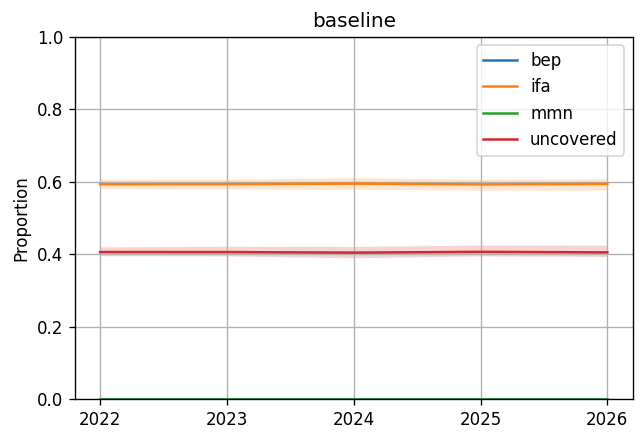

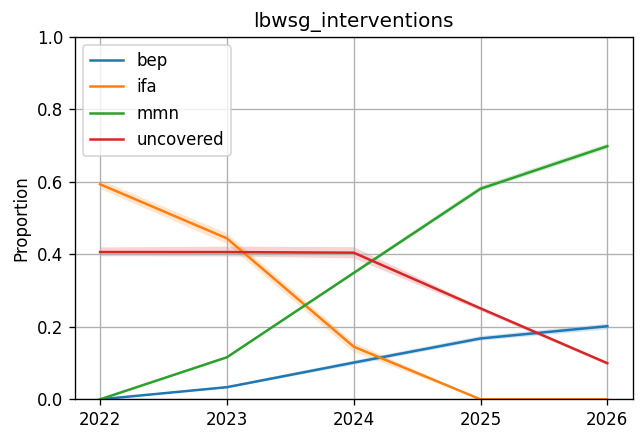

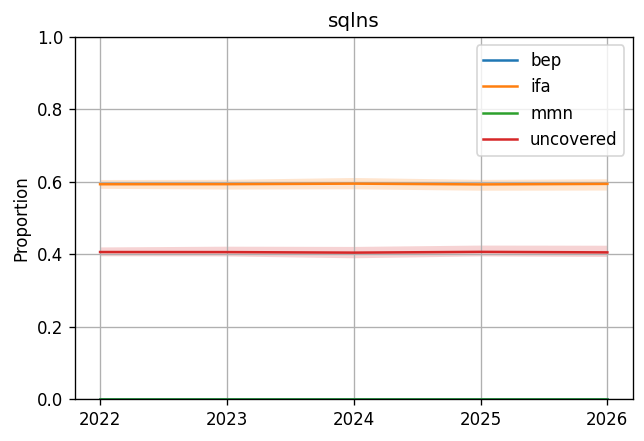

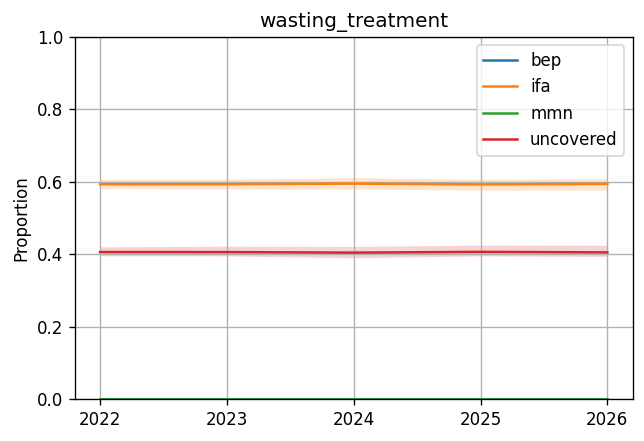

In [7]:
for scenario in cr.reset_index().scenario.unique():
    plt.figure(dpi=120)
    for regimen in cr.reset_index().maternal_supplementation.unique():
        p = cr.reset_index()
        p = p.loc[p.scenario==scenario]
        p = p.loc[p.maternal_supplementation==regimen]
        plt.plot(p.year, p['value','mean'], label=regimen)
        plt.fill_between(p.year, p['value','2.5%'], p['value','97.5%'], alpha=0.2)
    plt.legend()
    plt.ylim(0,1)
    plt.title(f'{scenario}')
    plt.ylabel('Proportion')
    plt.xticks(p.year.unique())
    plt.grid()
    
# conclusion:

    # looks as expected... baseline IFA coverage decreases before baseline uncovered
    # expected target rate
    # wiggles in lines are due to date cut off subtleties
    # should make this into a bar chart or something if we actually want to present these figures

## Check that BEP/MMS coverage are logical by maternal malnutrition status

In [8]:
c = birth_count.groupby(['input_draw','scenario','year','maternal_malnutrition','maternal_supplementation']).sum()
ca = birth_count.groupby(['input_draw','scenario','year','maternal_malnutrition']).sum()
cr = (c / ca).reset_index()
assert np.all(cr.loc[(cr.maternal_malnutrition=='cat1')&(cr.maternal_supplementation=='mmn')]['value']==0), 'Malnourished mothers getting MMN'
assert np.all(cr.loc[(cr.maternal_malnutrition=='cat2')&(cr.maternal_supplementation=='bep')]['value']==0), 'Non-malnourished mothers getting BEP'

# Check maternal regimen effects

In [9]:
bw_sum.head()

,sex,year,measure,input_draw,scenario,value,maternal_supplementation,maternal_malnutrition
0,female,2022,birth_weight_sum,29,baseline,0.000000e+00,bep,cat2
1,female,2022,birth_weight_sum,29,baseline,0.000000e+00,mmn,cat2
2,female,2022,birth_weight_sum,29,baseline,1.649433e+07,ifa,cat2
3,female,2022,birth_weight_sum,29,baseline,1.102632e+07,uncovered,cat2
4,female,2022,birth_weight_sum,29,baseline,0.000000e+00,bep,cat1


In [10]:
cols = ['input_draw','scenario','year','maternal_malnutrition','maternal_supplementation']
b = bw_sum.groupby(cols).sum()#.drop(columns='year')
bc = birth_count.groupby(cols).sum()#.drop(columns='year')
bw = (b/bc).groupby([c for c in cols if c != 'input_draw']).describe(percentiles=[0.025,0.975])
bw.dropna().head(10)

value  \
                                                             count   
scenario year maternal_malnutrition maternal_supplementation         
baseline 2022 cat1                  ifa                       12.0   
                                    uncovered                 12.0   
              cat2                  ifa                       12.0   
                                    uncovered                 12.0   
         2023 cat1                  ifa                       12.0   
                                    uncovered                 12.0   
              cat2                  ifa                       12.0   
                                    uncovered                 12.0   
         2024 cat1                  ifa                       12.0   
                                    uncovered                 12.0   

                                                                           \
                                                                     mean   
scenario year maternal_malnutrition maternal_supplementation                
baseline 2022 cat1                  ifa                       3113.080834   
                                    uncovered                 3069.699641   
              cat2                  ifa                       3255.391230   
                                    uncovered                 3202.640444   
         2023 cat1                  ifa                       3117.548434   
                                    uncovered                 3069.243141   
              cat2                  ifa                       3253.348913   
                                    uncovered                 3200.864934   
         2024 cat1                  ifa                       3122.257937   
                                    uncovered                 3059.852149   

                                                                         \
                                                                    std   
scenario year maternal_malnutrition maternal_supplementation              
baseline 2022 cat1                  ifa                       31.935290   
                                    uncovered                 45.656733   
              cat2                  ifa                       26.004400   
                                    uncovered                 29.107003   
         2023 cat1                  ifa                       31.734483   
                                    uncovered                 38.218290   
              cat2                  ifa                       25.626018   
                                    uncovered                 23.512220   
         2024 cat1                  ifa                       30.958963   
                                    uncovered                 31.894824   

                                                                           \
                                                                      min   
scenario year maternal_malnutrition maternal_supplementation                
baseline 2022 cat1                  ifa                       3071.492953   
                                    uncovered                 2984.694828   
              cat2                  ifa                       3202.889442   
                                    uncovered                 3161.494576   
         2023 cat1                  ifa                       3058.140774   
                                    uncovered                 2990.034261   
              cat2                  ifa                       3195.585254   
                                    uncovered                 3169.794018   
         2024 cat1                  ifa                       3069.660335   
                                    uncovered                 2992.147219   

                                                                           \
                                                                     2.5%   
scenario year ma

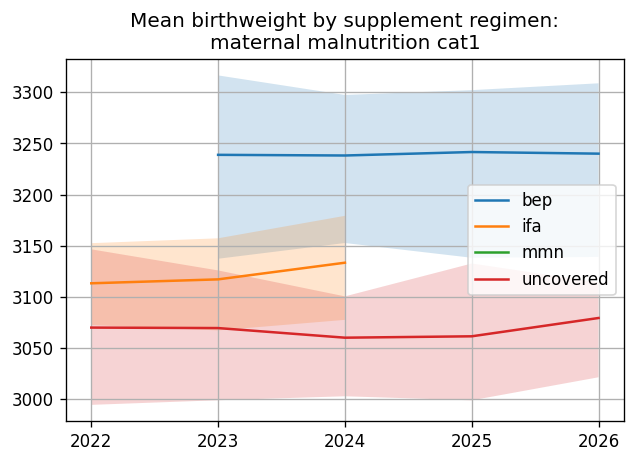

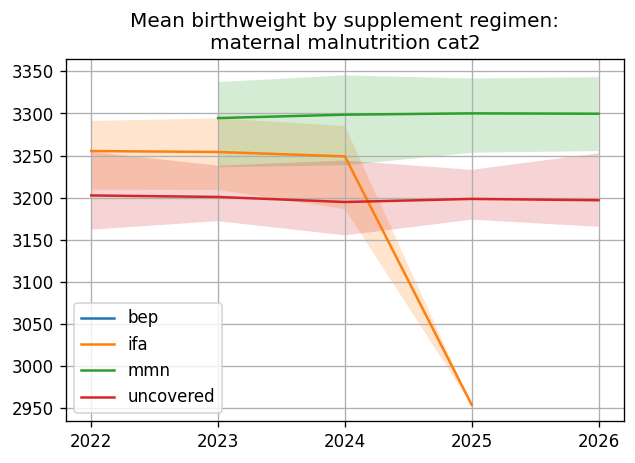

In [11]:
p = bw.reset_index()
p = p.loc[p.scenario=='lbwsg_interventions']
for cat in p.maternal_malnutrition.unique():
    plt.figure(dpi=120)
    for regimen in p.maternal_supplementation.unique():
        pp = p.loc[(p.maternal_malnutrition==cat)&(p.maternal_supplementation==regimen)]
        plt.plot(pp.year, pp['value','mean'], label=regimen)
        plt.fill_between(pp.year, pp['value','2.5%'], pp['value','97.5%'],alpha=.20)
    plt.title(f'Mean birthweight by supplement regimen:\nmaternal malnutrition {cat}')
    plt.legend()
    plt.grid()
    plt.xticks(pp.year.unique())

In [9]:
# obervation in 2025 for ifa looks weird... investigate
birth_count.loc[(birth_count.scenario=='lbwsg_interventions')
               &(birth_count.year==2025)
               &(birth_count.maternal_malnutrition=='cat2')
               &(birth_count.maternal_supplementation=='ifa')
               ]['value'].describe()

# just two births that occur in this strata... 
# don't need to worry about it

count    24.000000
mean      0.083333
std       0.408248
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       2.000000
Name: value, dtype: float64

In [12]:
cols = ['input_draw','scenario','maternal_malnutrition','maternal_supplementation']
b = bw_sum.groupby(cols).sum().drop(columns='year')
bc = birth_count.groupby(cols).sum().drop(columns='year')
bw = (b/bc).reset_index()
ifa = bw.loc[bw.maternal_supplementation=='ifa'].drop(columns='maternal_supplementation')
mmn = bw.loc[bw.maternal_supplementation=='mmn'].drop(columns='maternal_supplementation')
bep = bw.loc[bw.maternal_supplementation=='bep'].drop(columns='maternal_supplementation')
uncovered = bw.loc[bw.maternal_supplementation=='uncovered'].drop(columns='maternal_supplementation')

ifa_shift = ((ifa.set_index([c for c in ifa.columns if c != 'value']) 
             - uncovered.set_index([c for c in ifa.columns if c != 'value']))
              .groupby(['scenario','maternal_malnutrition']).describe(percentiles=[0.025,0.975]))
ifa_shift

# always positive
# target: +57.73 g (7.66 to 107.79)
# looks reasonable

value                        \
                                          count       mean        std   
scenario            maternal_malnutrition                               
baseline            cat1                   12.0  55.340269  28.063377   
                    cat2                   12.0  55.947521  26.903465   
lbwsg_interventions cat1                   12.0  50.752581  30.037563   
                    cat2                   12.0  55.057935  28.846828   
sqlns               cat1                   12.0  55.340269  28.063377   
                    cat2                   12.0  55.947521  26.903465   
wasting_treatment   cat1                   12.0  55.340269  28.063377   
                    cat2                   12.0  55.947521  26.903465   

                                                                            \
                                                 min       2.5%        50%   
scenario            maternal_malnutrition                                    
baseline            cat1                   16.946312  18.510608  48.930110   
                    cat2                   10.793949  14.692217  53.567905   
lbwsg_interventions cat1                   15.286454  15.753974  47.359297   
                    cat2                    8.101617  11.498798  54.729728   
sqlns               cat1                   16.946312  18.510608  48.930110   
                    cat2                   10.793949  14.692217  53.567905   
wasting_treatment   cat1                   16.946312  18.510608  48.930110   
                    cat2                   10.793949  14.692217  53.567905   

                                                                   
                                                97.5%         max  
scenario            maternal_malnutrition                          
baseline            cat1                   100.705490  102.142341  
                    cat2                    94.253351   95.663601  
lbwsg_interventions cat1                    96.824406   99.214018  
                    cat2                    92.730647   93.236799  
sqlns               cat1                   100.705490  102.142341  
                    cat2                    94.253351   95.663601  
wasting_treatment   cat1                   100.705490  102.142341  
                    cat2                    94.253351   95.663601

In [17]:
# but why was lbwsg/cat1 lower than all the rest??
# let's check the same thing stratified by year this time

cols = ['input_draw','scenario','maternal_malnutrition','year','maternal_supplementation']
b = bw_sum.groupby(cols).sum()
bc = birth_count.groupby(cols).sum()
bw = (b/bc).reset_index()
ifa = bw.loc[bw.maternal_supplementation=='ifa'].drop(columns='maternal_supplementation')
mmn = bw.loc[bw.maternal_supplementation=='mmn'].drop(columns='maternal_supplementation')
bep = bw.loc[bw.maternal_supplementation=='bep'].drop(columns='maternal_supplementation')
uncovered = bw.loc[bw.maternal_supplementation=='uncovered'].drop(columns='maternal_supplementation')

ifa_shift = ((ifa.set_index([c for c in ifa.columns if c != 'value']) 
             - uncovered.set_index([c for c in ifa.columns if c != 'value']))
              .groupby(['scenario','year','maternal_malnutrition']).describe(percentiles=[0.025,0.975]))
ifa_shift

# there's a lot of variation by year!
# lower value for lbwsg/cat1 in previous dataframe can be explained by stochastic variation because it is a small strata

value                         \
                                               count        mean        std   
scenario            year maternal_malnutrition                                
baseline            2022 cat1                   12.0   43.381193  38.230058   
                         cat2                   12.0   52.750787  27.852385   
                    2023 cat1                   12.0   48.305294  32.414008   
                         cat2                   12.0   52.483979  32.045951   
                    2024 cat1                   12.0   62.405788  30.631756   
                         cat2                   12.0   58.410746  30.903513   
                    2025 cat1                   12.0   62.368469  37.248389   
                         cat2                   12.0   56.260648  26.692651   
                    2026 cat1                   12.0   60.317229  26.338219   
                         cat2                   12.0   59.848193  24.709966   
lbwsg_interventions 2022 cat1                   12.0   43.381193  38.230058   
                         cat2                   12.0   52.750787  27.852385   
                    2023 cat1                   12.0   47.683631  35.119319   
                         cat2                   12.0   53.415582  31.180825   
                    2024 cat1                   12.0   73.421400  29.360832   
                         cat2                   12.0   54.175573  37.767715   
                    2025 cat1                    0.0         NaN        NaN   
                         cat2                    1.0 -220.917087        NaN   
                    2026 cat1                    0.0         NaN        NaN   
                         cat2                    0.0         NaN        NaN   
sqlns               2022 cat1                   12.0   43.381193  38.230058   
                         cat2                   12.0   52.750787  27.852385   
                    2023 cat1                   12.0   48.305294  32.414008   
                         cat2                   12.0   52.483979  32.045951   
                    2024 cat1                   12.0   62.405788  30.631756   
                         cat2                   12.0   58.410746  30.903513   
                    2025 cat1                   12.0   62.368469  37.248389   
                         cat2                   12.0   56.260648  26.692651   
                    2026 cat1                   12.0   60.317229  26.338219   
                         cat2                   12.0   59.848193  24.709966   
wasting_treatment   2022 cat1                   12.0   43.381193  38.230058   
                         cat2                   12.0   52.750787  27.852385   
                    2023 cat1                   12.0   48.305294  32.414008   
                         cat2                   12.0   52.483979  32.045951   
                    2024 cat1                   12.0   62.405788  30.631756   
                         cat2                   12.0   58.410746  30.903513   
                    2025 cat1                   12.0   62.368469  37.248389   
                         cat2                   12.0   56.260648  26.692651   
                    2026 cat1                   12.0   60.317229  26.338219   
                         cat2                   12.0   59.848193  24.709966   

                                                                        \
                                                       min        2.5%   
scenario            year maternal_malnutrition                           
baseline            2022 cat1                    -6.384038   -5.482058   
                         cat2                     5.190801   10.705722   
                    2023 cat1                    -1.716568    1.238627   
                         cat2                     1.148196    3.447883   
                    2024 cat1                    13.798653   15.096423   
                         cat2                    12.03948

In [13]:
mmn_shift = ((mmn.set_index([c for c in ifa.columns if c != 'value']) 
             - ifa.set_index([c for c in ifa.columns if c != 'value']))
              .groupby(['scenario','maternal_malnutrition']).describe(percentiles=[0.025,0.975]))


# always positive
# target: +45.16 (32.31 to 58.02)
# looks good
mmn_shift

value                       \
                                          count       mean       std   
scenario            maternal_malnutrition                              
baseline            cat1                    0.0        NaN       NaN   
                    cat2                    0.0        NaN       NaN   
lbwsg_interventions cat1                    0.0        NaN       NaN   
                    cat2                   12.0  45.080595  6.431945   
sqlns               cat1                    0.0        NaN       NaN   
                    cat2                    0.0        NaN       NaN   
wasting_treatment   cat1                    0.0        NaN       NaN   
                    cat2                    0.0        NaN       NaN   

                                                                            \
                                                 min       2.5%        50%   
scenario            maternal_malnutrition                                    
baseline            cat1                         NaN        NaN        NaN   
                    cat2                         NaN        NaN        NaN   
lbwsg_interventions cat1                         NaN        NaN        NaN   
                    cat2                   35.507937  36.337391  44.737692   
sqlns               cat1                         NaN        NaN        NaN   
                    cat2                         NaN        NaN        NaN   
wasting_treatment   cat1                         NaN        NaN        NaN   
                    cat2                         NaN        NaN        NaN   

                                                                 
                                               97.5%        max  
scenario            maternal_malnutrition                        
baseline            cat1                         NaN        NaN  
                    cat2                         NaN        NaN  
lbwsg_interventions cat1                         NaN        NaN  
                    cat2                   56.386488  56.587215  
sqlns               cat1                         NaN        NaN  
                    cat2                         NaN        NaN  
wasting_treatment   cat1                         NaN        NaN  
                    cat2                         NaN        NaN

In [14]:
bep_shift = ((bep.set_index([c for c in ifa.columns if c != 'value']) 
             - ifa.set_index([c for c in ifa.columns if c != 'value']))
              .groupby(['scenario','maternal_malnutrition']).describe(percentiles=[0.025,0.975]))

bep_shift
# always positive
# target: +45.16 (32.31 to 58.02) +66.96g (13.13 to 120.78) =~ 111
# looks reasonable

value                         \
                                          count        mean        std   
scenario            maternal_malnutrition                                
baseline            cat1                    0.0         NaN        NaN   
                    cat2                    0.0         NaN        NaN   
lbwsg_interventions cat1                   12.0  123.123138  38.456526   
                    cat2                    0.0         NaN        NaN   
sqlns               cat1                    0.0         NaN        NaN   
                    cat2                    0.0         NaN        NaN   
wasting_treatment   cat1                    0.0         NaN        NaN   
                    cat2                    0.0         NaN        NaN   

                                                                             \
                                                 min       2.5%         50%   
scenario            maternal_malnutrition                                     
baseline            cat1                         NaN        NaN         NaN   
                    cat2                         NaN        NaN         NaN   
lbwsg_interventions cat1                   46.359039  46.824616  131.762997   
                    cat2                         NaN        NaN         NaN   
sqlns               cat1                         NaN        NaN         NaN   
                    cat2                         NaN        NaN         NaN   
wasting_treatment   cat1                         NaN        NaN         NaN   
                    cat2                         NaN        NaN         NaN   

                                                                   
                                                97.5%         max  
scenario            maternal_malnutrition                          
baseline            cat1                          NaN         NaN  
                    cat2                          NaN         NaN  
lbwsg_interventions cat1                   160.857956  162.499603  
                    cat2                          NaN         NaN  
sqlns               cat1                          NaN         NaN  
                    cat2                          NaN         NaN  
wasting_treatment   cat1                          NaN         NaN  
                    cat2                          NaN         NaN